### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.0


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
from pandas import (
    DataFrame, HDFStore
)
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import h5py
filename = '/content/drive/My Drive/Colab Notebooks/11-01-2020/SVHN_single_grey1-2.h5'
h5 = h5py.File(filename,'r')
ls = list(h5)
ls

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [76]:
#(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
trainX = h5['X_train'][:]
trainY = h5['y_train'][:]
testX = h5['X_test'][:]
testY = h5['y_test'][:]
valX = h5['X_val'][:]
valY = h5['y_val'][:]
print("Shape of trainX: ",trainX.shape)
print("Shape of trainY: ",trainY.shape)
print("Shape of testX: ",testX.shape)
print("Shape of testY: ",testY.shape)
print("Shape of valX: ",valX.shape)
print("Shape of valY: ",valY.shape)

Shape of trainX:  (42000, 32, 32)
Shape of trainY:  (42000,)
Shape of testX:  (18000, 32, 32)
Shape of testY:  (18000,)
Shape of valX:  (60000, 32, 32)
Shape of valY:  (60000,)



#### Change train and test labels into one-hot vectors

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
valY = tf.keras.utils.to_categorical(valY, num_classes=10)



#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32X32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### Add fully connected layers with `relu` activations.

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(1024,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
from keras import regularizers
model.add(tf.keras.layers.Dense(10, activation='softmax',kernel_initializer='lecun_uniform'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2

In [82]:
model.fit(trainX,trainY,          
          validation_data=(valX,valY),
          epochs=20,
          batch_size=500)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 19s 453us/sample - loss: 1.6088 - acc: 0.4550 - val_loss: 1.2811 - val_acc: 0.5925
Epoch 2/20
42000/42000 [==============================] - 18s 438us/sample - loss: 0.9680 - acc: 0.6908 - val_loss: 0.7842 - val_acc: 0.7535
Epoch 3/20
42000/42000 [==============================] - 19s 454us/sample - loss: 0.8107 - acc: 0.7425 - val_loss: 0.6820 - val_acc: 0.7845
Epoch 4/20
42000/42000 [==============================] - 18s 438us/sample - loss: 0.7092 - acc: 0.7759 - val_loss: 0.5915 - val_acc: 0.8149
Epoch 5/20
42000/42000 [==============================] - 19s 452us/sample - loss: 0.6634 - acc: 0.7902 - val_loss: 0.5635 - val_acc: 0.8221
Epoch 6/20
42000/42000 [==============================] - 19s 446us/sample - loss: 0.5986 - acc: 0.8102 - val_loss: 0.5413 - val_acc: 0.8309
Epoch 7/20
42000/42000 [==============================] - 18s 440us/sample - loss: 0.5466 - acc: 0.8248 

In [83]:
model.evaluate(testX, testY, verbose=2)

18000/18000 - 3s - loss: 0.5163 - acc: 0.8549


[0.5162744450966518, 0.8548889]

In [249]:
import h5py
filename = '/content/drive/My Drive/Colab Notebooks/11-01-2020/SVHN_single_grey1-2.h5'
h5 = h5py.File(filename,'r')
ls = list(h5)

train_X = h5['X_train'][:]
train_Y = h5['y_train'][:]
test_X = h5['X_test'][:]
test_Y = h5['y_test'][:]
val_X = h5['X_val'][:]
val_Y = h5['y_val'][:]
print("Shape of trainX: ",train_X.shape)
print("Shape of trainY: ",train_Y.shape)
print("Shape of testX: ",test_X.shape)
print("Shape of testY: ",test_Y.shape)
print("Shape of valX: ",val_X.shape)
print("Shape of valY: ",val_Y.shape)


Shape of trainX:  (42000, 32, 32)
Shape of trainY:  (42000,)
Shape of testX:  (18000, 32, 32)
Shape of testY:  (18000,)
Shape of valX:  (60000, 32, 32)
Shape of valY:  (60000,)


In [250]:
train_X = train_X.reshape(42000,1024).astype('float32')
test_X = test_X.reshape(18000,1024).astype('float32')
val_X = val_X.reshape(60000,1024).astype('float32')
train_X /=255
test_X /=255

print("Shape of trainX: ",train_X.shape)
print("Shape of testX: ",test_X.shape)

Shape of trainX:  (42000, 1024)
Shape of testX:  (18000, 1024)


In [251]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=10)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=10)
val_Y = tf.keras.utils.to_categorical(val_Y, num_classes=10)


print("Shape of trainY: ",train_Y.shape)

print("Shape of testY: ",test_Y.shape)

print("Shape of valY: ",val_Y.shape)


Shape of trainY:  (42000, 10)
Shape of testY:  (18000, 10)
Shape of valY:  (60000, 10)


In [0]:
epochs=20
learning_rate = 0.3
decay_rate = learning_rate / epochs
momentum = 0.9

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(1024,input_shape=(1024,), kernel_initializer='he_normal'))
model1.add(tf.keras.layers.Activation('relu'))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(500, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model1.add(tf.keras.layers.Activation('relu'))
model1.add(tf.keras.layers.Dropout(0.1))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(200, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model1.add(tf.keras.layers.Activation('relu'))
model1.add(tf.keras.layers.Dropout(0.20))
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_normal',bias_initializer='he_uniform'))

#sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate,decay=decay_rate,momentum=momentum,nesterov=False)
sgd = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [253]:
model1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_55 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_94 (Dense)             (None, 500)               512500    
_________________________________________________________________
activation_56 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 500)             

In [254]:
model1.fit(train_X,train_Y,          
          validation_data=(val_X,val_Y),
          epochs=epochs,
          batch_size=300,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 16s 390us/sample - loss: 2.2190 - acc: 0.1961 - val_loss: 378.8687 - val_acc: 0.1863
Epoch 2/20
42000/42000 [==============================] - 15s 359us/sample - loss: 1.5835 - acc: 0.4426 - val_loss: 122.8559 - val_acc: 0.3142
Epoch 3/20
42000/42000 [==============================] - 15s 353us/sample - loss: 1.3772 - acc: 0.5393 - val_loss: 45.7572 - val_acc: 0.5324
Epoch 4/20
42000/42000 [==============================] - 15s 355us/sample - loss: 1.2898 - acc: 0.5753 - val_loss: 32.5040 - val_acc: 0.5900
Epoch 5/20
42000/42000 [==============================] - 15s 356us/sample - loss: 1.2397 - acc: 0.5963 - val_loss: 44.7080 - val_acc: 0.5944
Epoch 6/20
42000/42000 [==============================] - 15s 352us/sample - loss: 1.2069 - acc: 0.6051 - val_loss: 54.5896 - val_acc: 0.5821
Epoch 7/20
42000/42000 [==============================] - 15s 352us/sample - loss: 1.1739 - acc:

In [255]:
model1.evaluate(test_X, test_Y, verbose=1)

18000/18000 [==============================] - 3s 193us/sample - loss: 0.8330 - acc: 0.7444


[0.8330468033949534, 0.7443889]

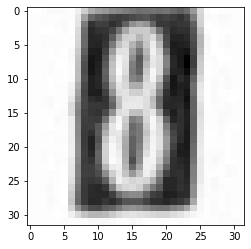

In [261]:
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline

plt.imshow(test_X[4455].reshape(32,32),cmap='gray')

In [262]:
model1.predict_classes(test_X)[4455]

8